### Import Necessary Packages

In [2]:
import pandas as pd
import json
import matplotlib.pyplot as plt

### Load and Convert Data

In [3]:
# Load data from a JSON file
with open('receipts.json', 'r') as file:
    data = [json.loads(line) for line in file]

# flatten JSON into DataFrame
df = pd.json_normalize(data)

df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1119 entries, 0 to 1118
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   bonusPointsEarned        544 non-null    float64
 1   bonusPointsEarnedReason  544 non-null    object 
 2   pointsEarned             609 non-null    object 
 3   purchasedItemCount       635 non-null    float64
 4   rewardsReceiptItemList   679 non-null    object 
 5   rewardsReceiptStatus     1119 non-null   object 
 6   totalSpent               684 non-null    object 
 7   userId                   1119 non-null   object 
 8   _id.$oid                 1119 non-null   object 
 9   createDate.$date         1119 non-null   int64  
 10  dateScanned.$date        1119 non-null   int64  
 11  finishedDate.$date       568 non-null    float64
 12  modifyDate.$date         1119 non-null   int64  
 13  pointsAwardedDate.$date  537 non-null    float64
 14  purchaseDate.$date      

,bonusPointsEarned,bonusPointsEarnedReason,pointsEarned,purchasedItemCount,rewardsReceiptItemList,rewardsReceiptStatus,totalSpent,userId,_id.$oid,createDate.$date,dateScanned.$date,finishedDate.$date,modifyDate.$date,pointsAwardedDate.$date,purchaseDate.$date
0,500.0,"Receipt number 2 completed, bonus point schedu...",500.0,5.0,"[{'barcode': '4011', 'description': 'ITEM NOT ...",FINISHED,26.00,5ff1e1eacfcf6c399c274ae6,5ff1e1eb0a720f0523000575,1609687531000,1609687531000,1.609688e+12,1609687536000,1.609688e+12,1.609632e+12
1,150.0,"Receipt number 5 completed, bonus point schedu...",150.0,2.0,"[{'barcode': '4011', 'description': 'ITEM NOT ...",FINISHED,11.00,5ff1e194b6a9d73a3a9f1052,5ff1e1bb0a720f052300056b,1609687483000,1609687483000,1.609687e+12,1609687488000,1.609687e+12,1.609601e+12
2,5.0,All-receipts receipt bonus,5,1.0,"[{'needsFetchReview': False, 'partnerItemId': ...",REJECTED,10.00,5ff1e1f1cfcf6c399c274b0b,5ff1e1f10a720f052300057a,1609687537000,1609687537000,NaN,1609687542000,NaN,1.609632e+12
3,5.0,All-receipts receipt bonus,5.0,4.0,"[{'barcode': '4011', 'description': 'ITEM NOT ...",FINISHED,28.00,5ff1e1eacfcf6c399c274ae6,5ff1e1ee0a7214ada100056f,1609687534000,1609687534000,1.609688e+12,1609687539000,1.609688e+12,1.609632e+12
4,5.0,All-receipts receipt bonus,5.0,2.0,"[{'barcode': '4011', 'description': 'ITEM NOT ...",FINISHED,1.00,5ff1e194b6a9d73a3a9f1052,5ff1e1d20a7214ada1000561,1609687506000,1609687506000,1.609688e+12,1609687511000,1.609688e+12,1.609601e+12


### Data Cleaning

In [4]:
# Rename columns for clarity
df.rename(columns={
    "_id.$oid": "id",
    "createDate.$date": "create_date",
    "dateScanned.$date": "date_scanned",
    "finishedDate.$date": "finished_date",
    "modifyDate.$date": "modify_date",
    "pointsAwardedDate.$date": "points_awarded_date",
    "purchaseDate.$date": "purchase_date"
}, inplace=True)

# Convert timestamps to datetime
df['create_date'] = pd.to_datetime(df['create_date'], unit='ms')
df['date_scanned'] = pd.to_datetime(df['date_scanned'], unit='ms')
df['finished_date'] = pd.to_datetime(df['finished_date'], unit='ms', errors='coerce')
df['modify_date'] = pd.to_datetime(df['modify_date'], unit='ms', errors='coerce')
df['points_awarded_date'] = pd.to_datetime(df['points_awarded_date'], unit='ms', errors='coerce')
df['purchase_date'] = pd.to_datetime(df['purchase_date'], unit='ms', errors='coerce')


In [5]:
df.head(10)

,bonusPointsEarned,bonusPointsEarnedReason,pointsEarned,purchasedItemCount,rewardsReceiptItemList,rewardsReceiptStatus,totalSpent,userId,id,create_date,date_scanned,finished_date,modify_date,points_awarded_date,purchase_date
0,500.0,"Receipt number 2 completed, bonus point schedu...",500.0,5.0,"[{'barcode': '4011', 'description': 'ITEM NOT ...",FINISHED,26.00,5ff1e1eacfcf6c399c274ae6,5ff1e1eb0a720f0523000575,2021-01-03 15:25:31,2021-01-03 15:25:31,2021-01-03 15:25:31,2021-01-03 15:25:36,2021-01-03 15:25:31,2021-01-03 00:00:00
1,150.0,"Receipt number 5 completed, bonus point schedu...",150.0,2.0,"[{'barcode': '4011', 'description': 'ITEM NOT ...",FINISHED,11.00,5ff1e194b6a9d73a3a9f1052,5ff1e1bb0a720f052300056b,2021-01-03 15:24:43,2021-01-03 15:24:43,2021-01-03 15:24:43,2021-01-03 15:24:48,2021-01-03 15:24:43,2021-01-02 15:24:43
2,5.0,All-receipts receipt bonus,5,1.0,"[{'needsFetchReview': False, 'partnerItemId': ...",REJECTED,10.00,5ff1e1f1cfcf6c399c274b0b,5ff1e1f10a720f052300057a,2021-01-03 15:25:37,2021-01-03 15:25:37,NaT,2021-01-03 15:25:42,NaT,2021-01-03 00:00:00
3,5.0,All-receipts receipt bonus,5.0,4.0,"[{'barcode': '4011', 'description': 'ITEM NOT ...",FINISHED,28.00,5ff1e1eacfcf6c399c274ae6,5ff1e1ee0a7214ada100056f,2021-01-03 15:25:34,2021-01-03 15:25:34,2021-01-03 15:25:34,2021-01-03 15:25:39,2021-01-03 15:25:34,2021-01-03 00:00:00
4,5.0,All-receipts receipt bonus,5.0,2.0,"[{'barcode': '4011', 'description': 'ITEM NOT ...",FINISHED,1.00,5ff1e194b6a9d73a3a9f1052,5ff1e1d20a7214ada1000561,2021-01-03 15:25:06,2021-01-03 15:25:06,2021-01-03 15:25:11,2021-01-03 15:25:11,2021-01-03 15:25:06,2021-01-02 15:25:06
5,750.0,"Receipt number 1 completed, bonus point schedu...",750.0,1.0,"[{'barcode': '4011', 'description': 'ITEM NOT ...",FINISHED,3.25,5ff1e1e4cfcf6c399c274ac3,5ff1e1e40a7214ada1000566,2021-01-03 15:25:24,2021-01-03 15:25:24,2021-01-03 15:25:25,2021-01-03 15:25:30,2021-01-03 15:25:25,2021-01-02 15:25:24
6,5.0,All-receipts receipt bonus,5.0,1.0,"[{'brandCode': 'MISSION', 'competitorRewardsGr...",FINISHED,2.23,5ff1e194b6a9d73a3a9f1052,5ff1e1cd0a720f052300056f,2021-01-03 15:25:01,2021-01-03 15:25:01,2021-01-03 15:25:02,2021-01-03 15:25:02,2021-01-03 15:25:02,2021-01-03 15:25:01
7,500.0,"Receipt number 2 completed, bonus point schedu...",500.0,1.0,"[{'barcode': '046000832517', 'brandCode': 'BRA...",FINISHED,10.00,5ff1e194b6a9d73a3a9f1052,5ff1e1a40a720f0523000569,2021-01-03 15:24:20,2021-01-03 15:24:20,2021-01-03 15:24:21,2021-01-03 15:24:21,2021-01-03 15:24:21,2020-12-27 00:00:00
8,5.0,All-receipts receipt bonus,5.0,5.0,"[{'barcode': '4011', 'description': 'ITEM NOT ...",FINISHED,20.00,5ff1e1eacfcf6c399c274ae6,5ff1e1ed0a7214ada100056e,2021-01-03 15:25:33,2021-01-03 15:25:33,2021-01-03 15:25:34,2021-01-03 15:25:38,2021-01-03 15:25:34,2021-01-03 00:00:00
9,250.0,"Receipt number 3 completed, bonus point schedu...",250.0,3.0,"[{'barcode': '4011', 'description': 'ITEM NOT ...",FINISHED,20.00,5ff1e1eacfcf6c399c274ae6,5ff1e1eb0a7214ada100056b,2021-01-03 15:25:31,2021-01-03 15:25:31,2021-01-03 15:25:31,2021-01-03 15:25:36,2021-01-03 15:25:31,2021-01-03 00:00:00


### Data Quality Check


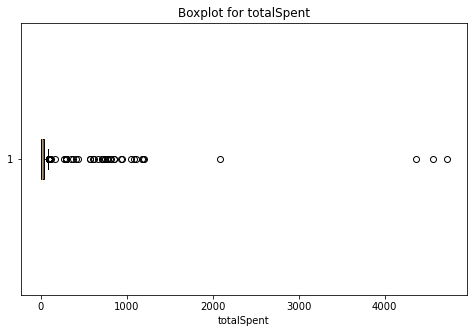

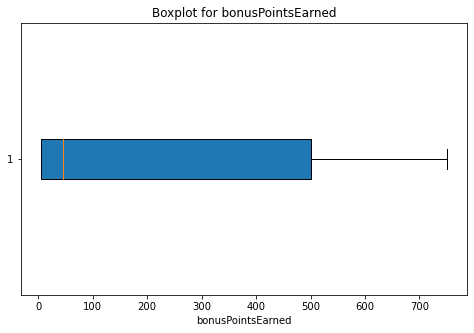

In [11]:
# Check for duplicates (ignore nested or unhashable structures)
duplicates_count = df.astype(str).duplicated().sum()

# Check for missing values
missing_values = df.isnull().sum()

# Verify uniqueness of IDs
unique_ids = df['id'].nunique()
total_ids = len(df)
non_unique_ids = total_ids - unique_ids

# Inspect categorical/numerical fields
unique_statuses = df['rewardsReceiptStatus'].unique()
total_spent_distribution = df['totalSpent'].astype(float).describe()
bonus_points_distribution = df['bonusPointsEarned'].describe()

# Logical consistency checks
invalid_bonus_points = df[df['bonusPointsEarned'] < 0].shape[0]
invalid_total_spent = df[df['totalSpent'].astype(float) < 0].shape[0]

# Outlier detection using boxplot
numerical_columns = ['totalSpent', 'bonusPointsEarned']

for column in numerical_columns:
    try:
        plt.figure(figsize=(8, 5))
        plt.boxplot(df[column].dropna().astype(float), vert=False, patch_artist=True)
        plt.title(f"Boxplot for {column}")
        plt.xlabel(column)
        plt.show()
    except Exception as e:
        print(f"Could not create boxplot for {column}: {e}")


### Data Quality Report

In [7]:

# Output data quality report
data_quality_report = {
    "Duplicate Rows": duplicates_count,
    "Missing Values by Column": missing_values.to_dict(),
    "Non-Unique IDs": non_unique_ids,
    "Unique Receipt Statuses": unique_statuses.tolist(),
    "Total Spent Distribution": total_spent_distribution.to_dict(),
    "Bonus Points Distribution": bonus_points_distribution.to_dict(),
    "Invalid Bonus Points (<0)": invalid_bonus_points,
    "Invalid Total Spent (<0)": invalid_total_spent
}

print("Data Quality Report:")
for key, value in data_quality_report.items():
    print(f"{key}: {value}")

Data Quality Report:
Duplicate Rows: 0
Missing Values by Column: {'bonusPointsEarned': 575, 'bonusPointsEarnedReason': 575, 'pointsEarned': 510, 'purchasedItemCount': 484, 'rewardsReceiptItemList': 440, 'rewardsReceiptStatus': 0, 'totalSpent': 435, 'userId': 0, 'id': 0, 'create_date': 0, 'date_scanned': 0, 'finished_date': 551, 'modify_date': 0, 'points_awarded_date': 582, 'purchase_date': 448}
Non-Unique IDs: 0
Unique Receipt Statuses: ['FINISHED', 'REJECTED', 'FLAGGED', 'SUBMITTED', 'PENDING']
Total Spent Distribution: {'count': 684.0, 'mean': 77.79685672514611, 'std': 347.11034944335967, 'min': 0.0, '25%': 1.0, '50%': 18.2, '75%': 34.96, 'max': 4721.95}
Bonus Points Distribution: {'count': 544.0, 'mean': 238.8933823529412, 'std': 299.0917307140741, 'min': 5.0, '25%': 5.0, '50%': 45.0, '75%': 500.0, 'max': 750.0}
Invalid Bonus Points (<0): 0
Invalid Total Spent (<0): 0
